## Bobot Jaringan Neural
![ann](Picture.png "ann")

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = np.array([[0.36, 0.47], [0.36, 0.57], [0.15, 0.57], [0.10, 0.78],
                 [0.21, 0.83], [0.41, 0.10], [0.62, 0.05], [0.67, 0.15],
                 [0.93, 0.01], [0.93, 0.05], [0.99, 0.21], [0.57, 0.05],
                 [0.83, 0.83], [0.73, 0.93], [0.57, 0.57], [0.99, 0.57]])

In [18]:
ciri = np.array([[0.24, 0.64], 
                 [0.73, 0.09],
                 [0.78, 0.73]])

In [19]:
deg_to_rad = lambda x: x*(np.pi/180.0)

## Fungsi Rotasi
$$\begin{aligned}\begin{pmatrix}
   x1_{baru} \\
   x2_{baru}
\end{pmatrix}&=
\begin{pmatrix}
   cos \theta_1 & -sin \theta_1 \\
   sin \theta_2 & cos \theta_2
\end{pmatrix}
\begin{pmatrix}
   (x1_{lama}-m) \\
   (x2_{lama}-n)
\end{pmatrix}+\begin{pmatrix}
   m \\
   n
\end{pmatrix}\\
&= \begin{pmatrix}cos \theta_1 \times x1_{lama} 
-cos \theta_1 \times m 
-sin \theta_1 \times x2_{lama} 
+sin \theta_1 \times n \\
sin \theta_2 \times x1_{lama} 
-sin \theta_2 \times m 
+cos \theta_2 \times x2_{lama} 
-cos \theta_2 \times n  \end{pmatrix} + 
\begin{pmatrix}m \\ n\end{pmatrix} \\
weight &\rightarrow \begin{pmatrix}x_0\space x_1\space x_2\end{pmatrix} \\
&\rightarrow \begin{pmatrix}
m - cos \theta_1 m+ sin\theta_1 n& cos \theta_1  
& -sin \theta_1 \\
n - cos \theta_2 n - sin\theta_2 m& sin \theta_2  
& cos \theta_2 \end{pmatrix}\end{aligned}$$

In [20]:
def rotasi(theta1, theta2, m, n):
    theta1rad = deg_to_rad(theta1)
    theta2rad = deg_to_rad(theta2)
    weight_arr = np.array([[m-np.cos(theta1rad)*m+np.sin(theta1rad)*n, np.cos(theta1rad), -np.sin(theta1rad)],
                           [n-np.cos(theta2rad)*n-np.sin(theta2rad)*m, np.sin(theta2rad), np.cos(theta2rad)]])
    return weight_arr

## Fungsi Skala
$$\begin{aligned}\begin{pmatrix}
   x1_{baru} \\
   x2_{baru}
\end{pmatrix}&=
\begin{pmatrix}
   a & 0 \\
   0 & b
\end{pmatrix}
\begin{pmatrix}
   (x1_{lama}-k) \\
   (x2_{lama}-l)
\end{pmatrix}+\begin{pmatrix}
   k \\
   l
\end{pmatrix}\\
&= \begin{pmatrix} a \times (x1_{lama}-k) + k \\ 
b \times (x2_{lama}-l) + l\end{pmatrix} \\
weight &\rightarrow \begin{pmatrix} x_0\space x_1\space x_2\end{pmatrix} \\
&\rightarrow \begin{pmatrix}k-ak & a & 0 \\
l-bl & 0 & b \end{pmatrix}\end{aligned}$$

In [21]:
def skala(a, b, k, l):
    weight_arr = np.array([[k-a*k, a, 0],
                           [l-b*l, 0, b]])
    return weight_arr

## Fungsi klasifikasi dengan Regresi Linear
$$\begin{aligned}\begin{aligned}\begin{pmatrix}
1.0 & x1_{0} & x2_{0} \\
1.0 & x1_{1} & x2_{1} \\
1.0 & ... & ... \\
1.0 & x1_{n} & x2_{n} \\ \end{pmatrix}\end{aligned}\begin{pmatrix}
w0 \\ w1 \\ w2\end{pmatrix}&=\begin{pmatrix}
+1 \\ ... \\ ... \\ -1 \end{pmatrix} \\
\begin{pmatrix} 
w0 \\ w1 \\ w2 \end{pmatrix} &=
\begin{pmatrix}\begin{pmatrix}
1.0 & 1.0 & ... & 1.0 \\ 
x1_{0} & x1_{1} & ... & x1_{n} \\
x2_{0} & x2_{1} & ... & x2_{n} \end{pmatrix}\begin{pmatrix}
1.0 & x1_{0} & x2_{0} \\
1.0 & x1_{1} & x2_{1} \\
1.0 & ... & ... \\
1.0 & x1_{n} & x2_{n} \\ \end{pmatrix}\end{pmatrix}^{-1}
\begin{pmatrix}
1.0 & 1.0 & ... & 1.0 \\ 
x1_{0} & x1_{1} & ... & x1_{n} \\
x2_{0} & x2_{1} & ... & x2_{n} \end{pmatrix}
\begin{pmatrix}
+1 \\ ... \\ ... \\ -1 \end{pmatrix}\end{aligned}$$

In [22]:
def klasifikasi_regresi_linear(inp, out):
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(inp.T,inp)),inp.T),out)

## Fungsi Garis Linear
$$y = w_{0}+w_{1}\times x1+w_{2}\times x2$$

In [23]:
garis_linear = lambda w, x: np.matmul(x,w)

## Klasifikasi dengan fungsi regresi linear
terdapat 3 garis untuk membedakan :
- lemari dan buffet
- lemari dan wardrope
- buffet dan wardrope

In [24]:
def klasifikasi_tiga_kelas(data):
    
    # adding bias +1 to input data 
    bias = np.array([np.ones(len(data))])
    data = np.hstack((bias.T,data))

    kelas_lemari = [0,5]
    kelas_buffet = [5,12]
    kelas_wardrope = [12,16]
    #berisi array untuk klasifikasi pembedaan kelas 
    kelas = np.array([[kelas_lemari, kelas_buffet], 
                      [kelas_lemari, kelas_wardrope], 
                      [kelas_buffet, kelas_wardrope]])

    #inisiasi weight 3 fungsi
    w = np.zeros((3,3)).T
    
    jumlah_kelas, _, _ = kelas.shape
    #print(jumlah_kelas)

    for i in range(jumlah_kelas):
        kelas_1 = data[kelas[i][0][0]:kelas[i][0][1],:]
        kelas_2 = data[kelas[i][1][0]:kelas[i][1][1],:]
        input_data = np.vstack((kelas_1, kelas_2))

        #buat output berdasarkan kelas
        out_kelas1 = np.array([[1] for _ in range(len(kelas_1))])
        out_kelas2 = np.array([[-1] for _ in range(len(kelas_2))])
        out_kelas = np.vstack((out_kelas1, out_kelas2))

        hasil_klasifikasi = klasifikasi_regresi_linear(input_data, out_kelas)
        j=0
        for val in hasil_klasifikasi:
            w[i][j]=val
            j+=1

    return w[0], w[1], w[2]


## Fungsi aktivasi bipolar / hardlim
$$sgn(x)=\begin{cases}
1, \text{if } x>0 \\
0, \text{if } x=0 \\
-1, \text{if } x<0 \end{cases}$$

In [25]:
def aktivasi_hardlim(x):
    out = np.array([1 if x_>0 else (0 if x_==0 else -1) for x_ in x])
    return out

In [26]:
#manually
def aktivasi_hardlim2(x):
    length = len(x)
    out = np.zeros(length)

    for i in range(length):
        if x[i] > 0:
            out[i] = 1
        elif x[i] == 0:
            out[i] = 0
        else:
            out[i] = -1
            
    return out

In [27]:
def nn(data):
    #initialize weight0 for rotation 
    weight_layer0 = rotasi(15, 0, 0.4, 0.3)

    #append bias to input data on layer 0
    size_point, _ = data.shape
    bias = np.array([np.ones(size_point)])
    input_data_layer_0 = np.hstack((bias.T, data))

    #matrix calculation
    out_layer_0 = np.matmul(weight_layer0, input_data_layer_0.T).T
    out_layer_0 = np.round(out_layer_0,2)

    #initialize weight1 for scale
    weight_layer1 = skala(1.5, 1.5, 0.4, 0.3)

    #append bias to input data on layer 1
    size_point, _ = out_layer_0.shape
    bias = np.array([np.ones(size_point)])
    input_data_layer_1 = np.hstack((bias.T, out_layer_0))

    #matrix calculation
    out_layer_1 = np.matmul(weight_layer1, input_data_layer_1.T).T
    out_layer_1 = np.round(out_layer_1,2)
    
    #initialize weight2 for classification with linear regression
    weight0_layer_2, weight1_layer_2, weight2_layer_2 = klasifikasi_tiga_kelas(out_layer_1)

    #append bias to input data on layer 2
    size_point, _ = out_layer_1.shape
    bias = np.array([np.ones(size_point)])
    input_data_layer_2 = np.hstack((bias.T, out_layer_1))

    #calculate output on layer 2
    y0 = garis_linear(weight0_layer_2, input_data_layer_2)
    y1 = garis_linear(weight1_layer_2, input_data_layer_2)
    y2 = garis_linear(weight2_layer_2, input_data_layer_2)
    
    #rounding up to 2 decimal
    y0 = np.round(y0, 2)
    y1 = np.round(y1, 2)
    y2 = np.round(y2, 2)

    #aktivasi output dengan fungsi hardlim/bipolar
    output_F0 = aktivasi_hardlim(y0)
    output_F1 = aktivasi_hardlim(y1)
    output_F2 = aktivasi_hardlim(y2)

    return out_layer_0, out_layer_1, weight0_layer_2, weight1_layer_2, weight2_layer_2, y0, y1, y2, output_F0, output_F1, output_F2


## Fungsi prediksi


In [28]:
def predict(F0, F1, F2):
    #klasifikasi pertama : lemari dan buffet
    #klasifikasi kedua   : lemari dan wardrope
    #klasifikasi ketiga  : buffet dan wardrope
    klasifikasi_1 = np.append(np.arange(0,5), np.arange(5,12))
    klasifikasi_2 = np.append(np.arange(0,5), np.arange(12,16))
    klasifikasi_3 = np.append(np.arange(5,12), np.arange(12,16))
    
    size_data = len(F0)
    out = np.empty(shape=size_data, dtype=object)

    for i in klasifikasi_1:
        if F0[i] == 1:
            out[i] = "lemari"
        elif F0[i] == -1:
            out[i] = "buffet"  

    for i in klasifikasi_2:
        if F1[i] == 1:
            out[i] = "lemari"
        elif F1[i] == -1:
            out[i] = "wardrope"

    for i in klasifikasi_3:
        if F2[i] == 1:
            out[i] = "buffet"
        elif F2[i] == -1:
            out[i] = "wardrope"  

    return out  


In [29]:
layer_0, layer_1, w0, w1, w2, y0, y1, y2, F0, F1, F2 = nn(data)
out = predict(F0, F1, F2)
df = pd.DataFrame({"x1":data[:,0], "x2":data[:,1], "x1_0":layer_0[:,0], "x2_0":layer_0[:,1], 
                  "x1_1":layer_1[:,0], "x2_1":layer_1[:,1], "y0":y0, "y1":y1, 
                  "y2":y2, "F0":F0, "F1":F1, "F2":F2, "out": out})
display(df)

,x1,x2,x1_0,x2_0,x1_1,x2_1,y0,y1,y2,F0,F1,F2,out
0,0.36,0.47,0.32,0.47,0.28,0.55,0.32,0.66,-0.13,1,1,-1,lemari
1,0.36,0.57,0.29,0.57,0.23,0.70,0.59,0.58,-0.41,1,1,-1,lemari
2,0.15,0.57,0.09,0.57,-0.07,0.70,0.73,1.19,-0.41,1,1,-1,lemari
3,0.10,0.78,-0.01,0.78,-0.22,1.02,1.32,1.11,-1.00,1,1,-1,lemari
4,0.21,0.83,0.08,0.83,-0.08,1.10,1.39,0.73,-1.15,1,1,-1,lemari
5,0.41,0.10,0.46,0.10,0.49,0.00,-0.67,0.90,0.89,-1,1,1,buffet
6,0.62,0.05,0.68,0.05,0.82,-0.07,-0.94,0.31,1.02,-1,1,1,buffet
7,0.67,0.15,0.70,0.15,0.85,0.08,-0.70,0.07,0.74,-1,1,1,buffet
8,0.93,0.01,0.99,0.01,1.28,-0.13,-1.24,-0.54,1.13,-1,-1,1,buffet
9,0.93,0.05,0.98,0.05,1.27,-0.07,-1.14,-0.59,1.02,-1,-1,1,buffet


## Display on graph
rumus fungsi garis (y=0):
$$y = w[0] + w[1]\times x[0] + w[2]\times x[2] \\
0 = w[0] + w[1]\times x[0] + w[2]\times x[2] \\
-w[0]-w[1]\times x[0] = w[2]\times x[2]\\
x[2] = \frac{-w[0]-w[1]\times x[0]}{w[2]}$$

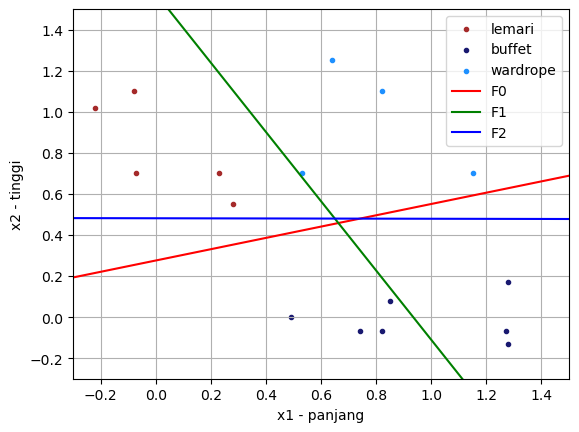

In [30]:
fungsi_garis = lambda x, w: (-w[0]-w[1]*x)/w[2]

#create line for line regression weight
x = np.arange(-0.3,1.5,0.001)
y0 = fungsi_garis(x, w0)
y1 = fungsi_garis(x, w1)
y2 = fungsi_garis(x, w2)

plt.scatter(layer_1[0:5,0], layer_1[0:5,1], color="brown", marker=".", label="lemari")
plt.scatter(layer_1[5:12,0], layer_1[5:12,1], color="midnightblue", marker=".", label="buffet")
plt.scatter(layer_1[12:16,0], layer_1[12:16,1], color="dodgerblue", marker=".", label="wardrope")
plt.plot(x, y0, color="red", label="F0")
plt.plot(x, y1, color="green", label="F1")
plt.plot(x, y2, color="blue", label="F2")
plt.grid(True)
plt.xlim(-0.3, 1.5)
plt.ylim(-0.3, 1.5)
plt.xlabel("x1 - panjang")
plt.ylabel("x2 - tinggi")
plt.legend()
plt.show()